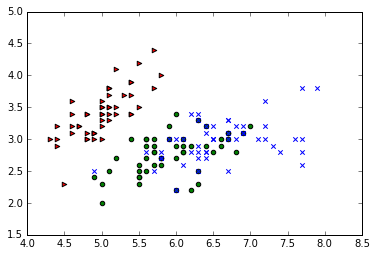

In [4]:
%matplotlib inline


from matplotlib import pyplot as plt
import numpy as np

# We load the data with load_iris from sklearn
from sklearn.datasets import load_iris
data = load_iris()

# load_iris returns an object with several fields
features = data.data
feature_names = data.feature_names

target = data.target
target_names = data.target_names

for t in range(3):
 if t == 0:
     c = 'r'
     marker = '>'
 elif t == 1:
     c = 'g'
     marker = 'o'
 elif t == 2:
     c = 'b'
     marker = 'x'
 plt.scatter(features[target == t, 0], features[target == t, 1], marker=marker, c=c)



In [5]:
labels = target_names[target]

# The petal length is the feature at position 2
plength = features[:, 2]

# Build an array of booleans:
is_setosa = (labels == 'setosa')

# This is the important step:
max_setosa =plength[is_setosa].max()

min_non_setosa = plength[~is_setosa].min()
print('Maximum of setosa: {0}.'.format(max_setosa))

print('Minimum of others: {0}.'.format(min_non_setosa))

Maximum of setosa: 1.9.
Minimum of others: 3.0.


In [6]:
# ~ is the boolean negation operator
features = features[~is_setosa]
labels = labels[~is_setosa]
# Build a new target variable, is_virigina
is_virginica = (labels == 'virginica')

In [7]:
# Initialize best_acc to impossibly low value
best_acc = -1.0
for fi in range(features.shape[1]):
    # We are going to test all possible thresholds
    thresh = features[:,fi]

    for t in thresh:
        # Get the vector for feature `fi`
        feature_i = features[:, fi]
        # apply threshold `t`
        pred = (feature_i > t)
        acc = (pred == is_virginica).mean()
        rev_acc = (pred == ~is_virginica).mean()
        if rev_acc > acc:
            reverse = True
            acc = rev_acc
        else:
            reverse = False

        if acc > best_acc:
            best_acc = acc
            best_fi = fi
            best_t = t
            best_reverse = reverse

print(best_fi, best_t, best_reverse, best_acc)

(3, 1.6000000000000001, False, 0.93999999999999995)


In [8]:
def is_virginica_test(fi, t, reverse, example):
    'Apply threshold model to a new example'
    test = example[fi] > t
    if reverse:
        test = not test
    return test

from threshold import fit_model, predict

# ning accuracy was 96.0%.
# ing accuracy was 90.0% (N = 50).
correct = 0.0

for ei in range(len(features)):
    # select all but the one at position `ei`:
    training = np.ones(len(features), bool)
    training[ei] = False
    testing = ~training
    model = fit_model(features[training], is_virginica[training])
    predict(model, features[testing])
    predictions = predict(model, features[testing])
    correct += np.sum(predictions == is_virginica[testing])
acc = correct/float(len(features))
print('Accuracy: {0:.1%}'.format(acc))

Accuracy: 87.0%
